# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Grouping and Summarizing Data

Previously we were able to merge two DataFrames. Another type of wrangling we would want to do is to group rows of data and perform operations on the group. This is done using groupby statements. 


## The Superstore dataset

Previously we have merged the Orders and Products tables to create a new dataset called orders_by_product.csv.

This is the dataset that we will read in, let's call it `merged` as we did previously.

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the dataset


In [ ]:
# read in the orders dataset
merged = pd.read_csv('datasets/orders_by_product.csv')

In [ ]:
# Check the first 5 rows
merged.head()

In [ ]:
# Check the columns
merged.columns

Great! Now we can analyse the data by **splitting** the data by `category`, `sub_category`, `year`, `month` and even the `order_day`.


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ To tackle this problem, we'll use the **Split-Apply-Combine** technique. 

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in `pandas` (the **Combine** step is done for us).

- First, we use the `groupby()` statements to segment our data to a specific subsets.
- Then, we apply the function that we want to use.

The result will be the list of groups that we have specified, with the calculated value for each group. 


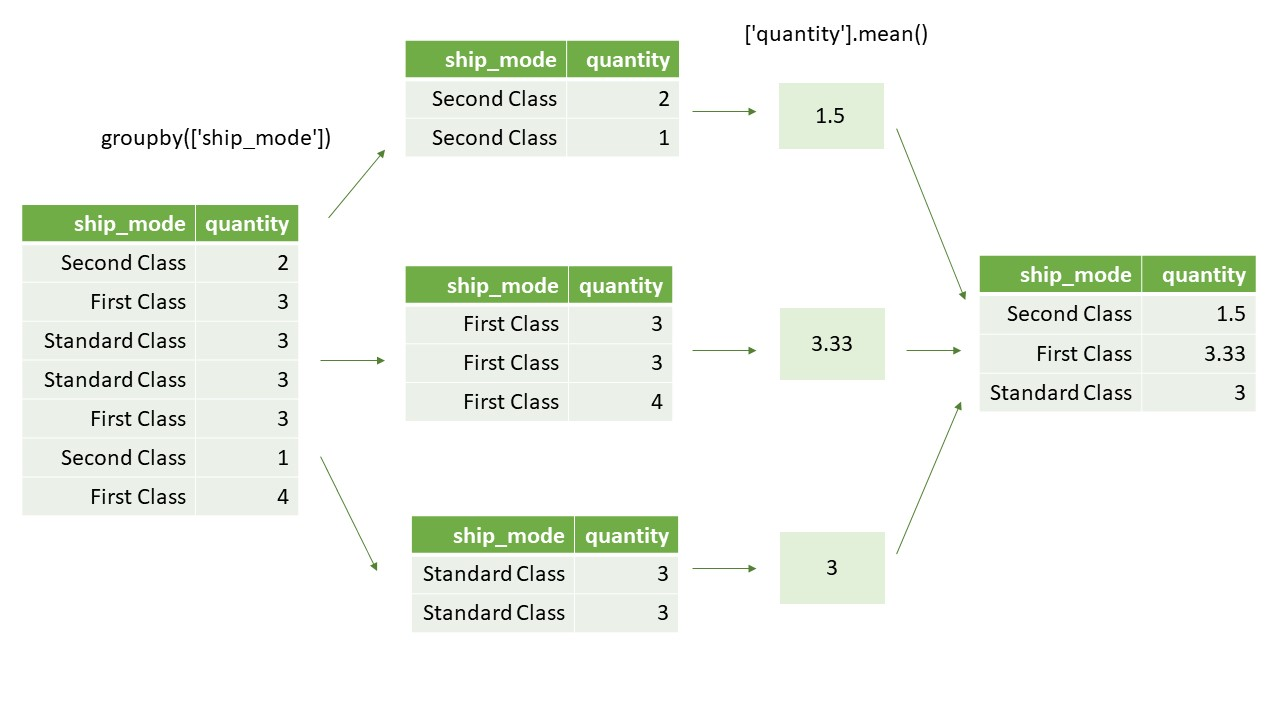



Let's try it out!

In [ ]:
# If we just want to count the number of rows in the 'order_id' row
merged['order_id'].count()

Let's group by `ship_mode`, and get a count of orders for each ship mode.

In [ ]:
# Counting AFTER we group by ship mode
merged.groupby('ship_mode')['order_id'].count()

In [ ]:
# Is this similar to value_counts()? What's the difference?
merged['ship_mode'].value_counts()

We can see that the value_counts() is also counting by groups, and sorts by the highest value, but groupby() sorts the results in alphabetical order of the groups by default. 

However, using groupby, we can get *other* aggregated values by category, such as the *max*, *min*, *mean*, etc.


Let's find out the highest sales amount for each ship mode:

In [ ]:
# find the max sales by ship mode, return as a Series
merged.groupby('ship_mode')['sales'].max()

In [ ]:
# find the mean values for all other columns in the DataFrame by ship mode
merged.groupby('ship_mode').mean()

#### Quick Exercise

Find the sum of profit for each ship_mode for all orders.

In [ ]:
# return a series
merged.groupby('ship_mode')['profit'].sum()

#### Multiple Aggregations On the Same Column

We can also use the `.agg()` method with multiple arguments, to simulate a `.describe()` method like we used before:

In [ ]:
merged.groupby('ship_mode')['sales'].agg(['count','mean','min','max'])

In [ ]:
merged.describe()

#### Multi-level Groupby

We can also do multi-level groupbys. 



In [ ]:
# Let's have a look at the different categories orders fall under
merged.head()

This is referred to as a `Multiindex` dataframe. Here, we can see the following fields in a nested group by, with a count of order_ids effectively giving us a count of the number of orders for every unique ship_mode and category combination:

- Ship Mode - Second Class, First Class, Standard Class, Same Day
- Category - Furniture, Office Supplies, Technology

In [ ]:
# Return the result as a Series
merged.groupby(['category','ship_mode'])['order_id'].count()


In [ ]:
# Unstack the columns so that one becomes a row header
merged.groupby(['category','ship_mode'])['order_id'].count().unstack()

As you can see, groupby() is useful for us to obtain aggregate functions that help us to compare the data across categories. We will do more exercises in the homework below for you to practice.



### Plotting with Pandas

Pandas can create some simple plots to visualize the grouped data.


In [ ]:
# Remember we found the total profit for each ship mode

# Let's save the results
plotdata = merged.groupby('ship_mode')['profit'].sum()
print(plotdata)
# then just plot it


In [ ]:
# Default is line plot
#plotdata.plot()
# Try bar plot
plotdata.plot(kind='bar')

# Try other kinds: barh, pie

In [ ]:
merged.groupby('ship_mode')['discount'].mean().plot(kind='bar')

In [ ]:
# Try to plot the multi level group:

plotdata=merged.groupby(['ship_mode','category'])['order_id'].count()
print(plotdata)
# adjust the plot size: what does this show us? will a bar plot be better?
plotdata.plot(kind='bar')

In [ ]:
#unstack then plot
# Try to plot the multi level group:
plotdata=merged.groupby(['ship_mode','category'])['order_id'].count().unstack()
print(plotdata)

plotdata.plot(kind='bar')

## Wrap up

We've covered main data wrangling and cleaning tasks! Here are the key takeaways:

- **Missing data** comes in many shapes and sizes. Before deciding how to handle it, we identify it exists. We then derive how the missingness is affecting our dataset, and make a determination about how to fill in values.

```python
# pro tip for identifying missing data
df.isnull().sum()
```

- **Merging DataFrames** helps us to join datasets on a key column, similar to SQL joins. 

```
pd.merge(left, right, how='inner', on='indexlabel')
```

- **Groupby** statements are particularly useful for a subsection-of-interest analysis. Specifically, zooming in on one condition, and determining relevant statstics.

```python
# group by 
df.groupby('column').agg['count', 'mean', 'max', 'min']
```

- **Apply functions** help us clean values across an entire DataFrame column. They are *like* a for loop for cleaning, but many times more efficient. They follow a common pattern:
1. Write a function that works on a single value
2. Test that function on a single value
3. Apply that function to a whole column

(The most confusing part of apply functions is that we write them with *a single value* in mind, and then apply them to many single values at once.)

#### Review Exercises / Homework

Let's practice what we have learned in this unit. We want to analyse the returns from the orders.

Q1. Read in the file `returns.csv`, then merge the `merged` DataFrame with the `returns` to determine if there were any returns on each order. Name the new DataFrame `merged_returns`.


In [55]:
# Q1 Answer 
returns = pd.read_csv('./datasets/returns.csv')
merged = pd.read_csv('./datasets/orders_by_product.csv')
#print(merged.head())
#print(returns.head())
merged_returns = pd.merge(merged, returns, how='left', on='order_id')
merged_returns

order_id  order_date   ship_date       ship_mode customer_id  \
0      ID-2022-83625  2022-07-28  2022-07-31    Second Class    RS-19420   
1      IN-2020-85480  2020-07-31  2020-02-08     First Class    CS-12490   
2      IN-2020-21206  2020-07-02  2020-12-02  Standard Class    SC-20800   
3      IN-2019-50060  2019-07-09  2019-09-14  Standard Class    MC-17575   
4      IN-2019-25889  2019-08-12  2019-12-12  Standard Class    BP-11185   
...              ...         ...         ...             ...         ...   
10918  IN-2019-70780  2019-04-10  2019-04-10        Same Day    JK-15205   
10919  IN-2020-54358  2020-01-22  2020-01-24    Second Class    CS-12400   
10920  IN-2020-49073  2020-03-21  2020-03-27  Standard Class    BG-11695   
10921  IN-2020-19687  2020-01-06  2020-05-06  Standard Class    CL-11890   
10922  IN-2022-55912  2022-09-08  2022-08-13  Standard Class    RR-19315   

            product_id     sales  quantity  discount    profit  ...  \
0      FUR-BO-10000008   465.156         2  0.400000  -255.864  ...   
1      FUR-BO-10000021   243.060         2  0.149847   102.060  ...   
2      FUR-BO-10000035  1236.330         3  0.000000   519.210  ...   
3      FUR-BO-10000035  2472.660         6  0.149847  1038.420  ...   
4      FUR-BO-10000035  2596.293         7  0.100000   923.013  ...   
...                ...       ...       ...       ...       ...  ...   
10918  TEC-PH-10004959   780.165         5  0.100000   320.715  ...   
10919  TEC-PH-10004959   346.740         2  0.000000   162.960  ...   
10920  TEC-PH-10004959   173.370         1  0.000000    81.480  ...   
10921  TEC-PH-10004959   346.740         4  0.500000   -20.820  ...   
10922  TEC-PH-10004959   520.110         3  0.000000   244.440  ...   

       sub_category                             description unit_cost  \
0         Bookcases  Sauder Library with Doors, Traditional    360.51   
1         Bookcases            Dania Corner Shelving, Metal     70.50   
2         Bookcases            Dania Classic Bookcase, Pine    239.04   
3         Bookcases            Dania Classic Bookcase, Pine    239.04   
4         Bookcases            Dania Classic Bookcase, Pine    239.04   
...             ...                                     ...       ...   
10918        Phones     Motorola Audio Dock, with Caller ID     91.89   
10919        Phones     Motorola Audio Dock, with Caller ID     91.89   
10920        Phones     Motorola Audio Dock, with Caller ID     91.89   
10921        Phones     Motorola Audio Dock, with Caller ID     91.89   
10922        Phones     Motorola Audio Dock, with Caller ID     91.89   

      days_to_ship  order_year  order_month_no  order_day  order_day_name  \
0                3        2022               7          3        Thursday   
1             -174        2020               7          4          Friday   
2              153        2020               7          3        Thursday   
3               67        2019               7          1         Tuesday   
4              122        2019               8          0          Monday   
...            ...         ...             ...        ...             ...   
10918            0        2019               4          2       Wednesday   
10919            2        2020               1          2       Wednesday   
10920            6        2020               3          5        Saturday   
10921          121        2020               1          0          Monday   
10922          -26        2022               9          3        Thursday   

       margin_category returned  
0                  Low      NaN  
1                 High      NaN  
2                 High      NaN  
3                 High      NaN  
4                 High      NaN  
...                ...      ...  
10918             High      NaN  
10919             High      NaN  
10920             High      NaN  
10921              Low      NaN  
10922             High      NaN  

[10923 rows x 22 columns]

Q2. How many missing values are there in the `returned` column of `merged_returns`?



In [56]:
# Q2 Answer
merged_returns.isnull().sum()

order_id               0
order_date             0
ship_date              0
ship_mode              0
customer_id            0
product_id             0
sales                  0
quantity               0
discount               0
profit                 0
profit_margin          0
category               0
sub_category           0
description            0
unit_cost              0
days_to_ship           0
order_year             0
order_month_no         0
order_day              0
order_day_name         0
margin_category        0
returned           10138
dtype: int64

Q3. Check the value_counts() of the `returned` column, with kwarg `dropna=False`.

In [57]:
# Q3 Answer
merged_returns['returned'].value_counts()
merged_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10923 non-null  object 
 1   order_date       10923 non-null  object 
 2   ship_date        10923 non-null  object 
 3   ship_mode        10923 non-null  object 
 4   customer_id      10923 non-null  object 
 5   product_id       10923 non-null  object 
 6   sales            10923 non-null  float64
 7   quantity         10923 non-null  int64  
 8   discount         10923 non-null  float64
 9   profit           10923 non-null  float64
 10  profit_margin    10923 non-null  float64
 11  category         10923 non-null  object 
 12  sub_category     10923 non-null  object 
 13  description      10923 non-null  object 
 14  unit_cost        10923 non-null  float64
 15  days_to_ship     10923 non-null  int64  
 16  order_year       10923 non-null  int64  
 17  order_month_

Q4. Fill the missing values in the `returned` column of the new `merged_returns` DataFrame with `'No'` 
Once you are satisfied it is correct, you can set `inplace=True`. 
You can run your answer to Q3 again to check the value counts after filling!

In [58]:
# Q4 Answer
merged_returns['returned'].fillna(value='No', inplace=True)

Q5. Now that we have the `returned` column in the `merged_returns` DataFrame, use a groupby() to compare the mean sales for orders which were returned and those which were not.

In [59]:
# Q5 Answer
merged_returns.groupby('returned')['sales'].mean()

returned
No     325.128369
Yes    338.145324
Name: sales, dtype: float64

Q6. Use a multi-level groupby to compare the orders by `returned`, `category` then `ship_mode`. Return the means for all numeric columns. 

In [60]:
# Q6 Answer
merged_returns.groupby(['returned', 'category','ship_mode'])[['sales','discount', 'profit', 'profit_margin', 'unit_cost','quantity','days_to_ship','order_year', 'order_month_no','order_day']].mean()

sales  discount      profit  \
returned category        ship_mode                                          
No       Furniture       First Class     529.076212  0.146385   42.613502   
                         Same Day        453.840259  0.145588   45.619082   
                         Second Class    513.152226  0.143162   33.524436   
                         Standard Class  583.623580  0.142668   55.961457   
         Office Supplies First Class     135.098406  0.171926   13.504443   
                         Same Day        139.887590  0.162163   11.572484   
                         Second Class    140.315702  0.153037   18.186352   
                         Standard Class  142.661795  0.163340   16.847668   
         Technology      First Class     579.872649  0.149100   88.540752   
                         Same Day        532.312659  0.161282   62.237787   
                         Second Class    560.680524  0.134714   78.872452   
                         Standard Class  570.463871  0.138454   83.027538   
Yes      Furniture       First Class     405.767708  0.045405   57.407708   
                         Same Day        901.518200  0.028333  295.993200   
                         Second Class    713.692100  0.125641   48.376715   
                         Standard Class  458.131392  0.088639   85.695082   
         Office Supplies First Class     222.937441  0.113521   34.343075   
                         Same Day        184.833840  0.045500   37.434840   
                         Second Class    134.129759  0.113431   14.032994   
                         Standard Class  181.470576  0.117820   27.610447   
         Technology      First Class     309.873808  0.096154   54.229962   
                         Same Day        816.582300  0.011667  142.737300   
                         Second Class    493.094731  0.124103  116.752423   
                         Standard Class  609.240662  0.095097  138.656250   

                                         profit_margin   unit_cost  quantity  \
returned category        ship_mode                                             
No       Furniture       First Class          0.085463  134.874112  3.725857   
                         Same Day             0.104314  111.514118  3.598039   
                         Second Class         0.072163  137.863326  3.655814   
                         Standard Class       0.078294  139.259825  3.780364   
         Office Supplies First Class          0.037099   32.822963  3.719753   
                         Same Day             0.058298   37.624362  3.585106   
                         Second Class         0.070470   31.123678  3.672370   
                         Standard Class       0.051104   33.056733  3.770839   
         Technology      First Class          0.070740  132.039357  3.620579   
                         Same Day             0.066752  112.009487  3.991453   
                         Second Class         0.097810  123.509643  3.916667   
                         Standard Class       0.076377  131.128829  3.720913   
Yes      Furniture       First Class          0.170811  113.382162  3.702703   
                         Same Day             0.311667  188.445000  3.166667   
                         Second Class         0.097692  149.012308  4.358974   
                         Standard Class       0.156990  105.807087  3.825243   
         Office Supplies First Class          0.077042   41.992394  4.084507   
                         Same Day             0.249000   46.038000  4.500000   
                         Second Class         0.104314   31.859118  3.715686   
                         Standard Class       0.091880   41.221282  4.042735   
         Technology      First Class          0.113077  106.268077  2.961538   
                         Same Day             0.213333  276.240000  2.666667   
                         Second Class         0.110513  133.201538  3.743590   
                         Standard Class    

Q7. Write a function called `discount_level` that receives a value `discount` and returns a string based on the following:
if the discount is 0.0, then return 'None', otherwise if discount is greater than 0.2, return 'High'. Any other value is considered 'Low'.


In [61]:
#Q7 Answer
def discount_level(discount):
    if discount == 0.0:
        return 'None'
    if discount > 0.2:
        return 'High'
    else:
        return 'Low'

Q8. Apply the function `discount_level` to the `discount` column of `merged_returns` to create a new column.

In [62]:
# Q8 Anwer
merged_returns['discount_level'] = merged_returns['discount'].apply(discount_level)
merged_returns

order_id  order_date   ship_date       ship_mode customer_id  \
0      ID-2022-83625  2022-07-28  2022-07-31    Second Class    RS-19420   
1      IN-2020-85480  2020-07-31  2020-02-08     First Class    CS-12490   
2      IN-2020-21206  2020-07-02  2020-12-02  Standard Class    SC-20800   
3      IN-2019-50060  2019-07-09  2019-09-14  Standard Class    MC-17575   
4      IN-2019-25889  2019-08-12  2019-12-12  Standard Class    BP-11185   
...              ...         ...         ...             ...         ...   
10918  IN-2019-70780  2019-04-10  2019-04-10        Same Day    JK-15205   
10919  IN-2020-54358  2020-01-22  2020-01-24    Second Class    CS-12400   
10920  IN-2020-49073  2020-03-21  2020-03-27  Standard Class    BG-11695   
10921  IN-2020-19687  2020-01-06  2020-05-06  Standard Class    CL-11890   
10922  IN-2022-55912  2022-09-08  2022-08-13  Standard Class    RR-19315   

            product_id     sales  quantity  discount    profit  ...  \
0      FUR-BO-10000008   465.156         2  0.400000  -255.864  ...   
1      FUR-BO-10000021   243.060         2  0.149847   102.060  ...   
2      FUR-BO-10000035  1236.330         3  0.000000   519.210  ...   
3      FUR-BO-10000035  2472.660         6  0.149847  1038.420  ...   
4      FUR-BO-10000035  2596.293         7  0.100000   923.013  ...   
...                ...       ...       ...       ...       ...  ...   
10918  TEC-PH-10004959   780.165         5  0.100000   320.715  ...   
10919  TEC-PH-10004959   346.740         2  0.000000   162.960  ...   
10920  TEC-PH-10004959   173.370         1  0.000000    81.480  ...   
10921  TEC-PH-10004959   346.740         4  0.500000   -20.820  ...   
10922  TEC-PH-10004959   520.110         3  0.000000   244.440  ...   

                                  description unit_cost days_to_ship  \
0      Sauder Library with Doors, Traditional    360.51            3   
1                Dania Corner Shelving, Metal     70.50         -174   
2                Dania Classic Bookcase, Pine    239.04          153   
3                Dania Classic Bookcase, Pine    239.04           67   
4                Dania Classic Bookcase, Pine    239.04          122   
...                                       ...       ...          ...   
10918     Motorola Audio Dock, with Caller ID     91.89            0   
10919     Motorola Audio Dock, with Caller ID     91.89            2   
10920     Motorola Audio Dock, with Caller ID     91.89            6   
10921     Motorola Audio Dock, with Caller ID     91.89          121   
10922     Motorola Audio Dock, with Caller ID     91.89          -26   

      order_year  order_month_no  order_day  order_day_name  margin_category  \
0           2022               7          3        Thursday              Low   
1           2020               7          4          Friday             High   
2           2020               7          3        Thursday             High   
3           2019               7          1         Tuesday             High   
4           2019               8          0          Monday             High   
...          ...             ...        ...             ...              ...   
10918       2019               4          2       Wednesday             High   
10919       2020               1          2       Wednesday             High   
10920       2020               3          5        Saturday             High   
10921       2020               1          0          Monday              Low   
10922       2022               9          3        Thursday             High   

       returned discount_level  
0            No           High  
1            No            Low  
2            No           None  
3            No            Low  
4            No            Low  
...         ...            ...  
10918        No            Low  
10919        No           None  
10920        No           None  
10921        No           High  
10922        No           None  

[10923 rows x 23 column

Q9. Using `groupby()` and `count()`, visualize the number of orders that were returned and not returned based on the new discount level with a suitable plot. 


discount_level  High   Low  None
returned                        
No              2896  3116  4126
Yes              148   158   479


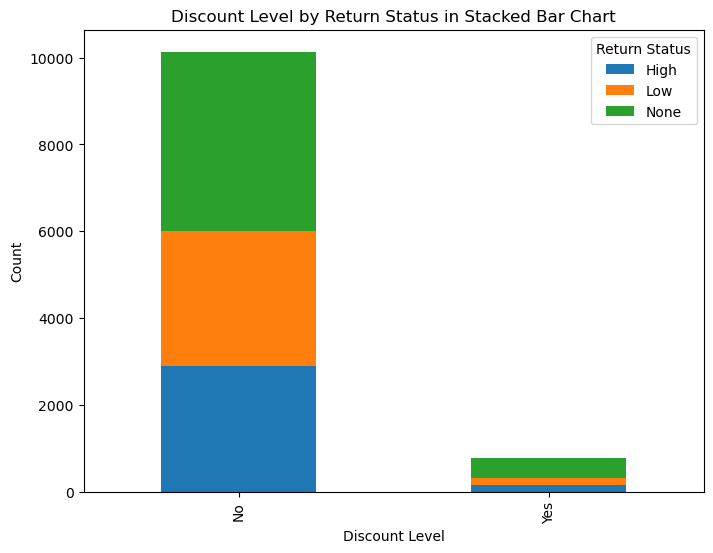

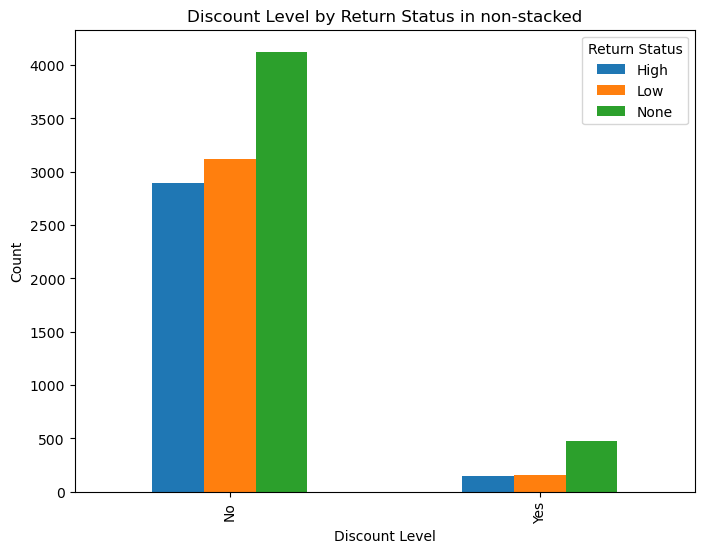

In [63]:
#Q9 answer
plot_data = merged_returns.groupby(['returned','discount_level'])['discount_level'].count().unstack()
print(plot_data)
ax = plot_data.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.set_xlabel('Discount Level')
ax.set_ylabel('Count')
ax.set_title('Discount Level by Return Status in Stacked Bar Chart')
ax.legend(title='Return Status')

ay = plot_data.plot(kind='bar', figsize=(8, 6))
ay.set_xlabel('Discount Level')
ay.set_ylabel('Count')
ay.set_title('Discount Level by Return Status in non-stacked')
ay.legend(title='Return Status')
plt.show()

Q10. Congratulations! Save the `merged_returns` file as 'returned_orders.csv'.
    

In [64]:
# Q10 Answer
merged_returns.to_csv('./datasets/returned_orders.csv', index=False)
